In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [2]:
pd.options.display.max_colwidth = 200

In [3]:
initial_data = pd.read_csv('../data/products_cleaned.csv')
postprocessing = pd.read_csv('../data/postprocessing.csv')
df = initial_data.join(postprocessing.set_index('id'), on='id')
df.to_csv('../data/results.csv', index=False)

In [4]:
def get_image(itemid):
    img_address ='../data/img_n/'+itemid+'.jpg'
    image = Image.open(img_address)
    return image.convert("RGB")

def print_images(idlist,categorylist,title,columns):
    rows = int(len(idlist)/columns)
    fig = plt.figure(figsize=(15, rows*4))
    fig.suptitle(title,fontsize=24)
    
    ax = []
    for i in range(columns*rows):
        img = get_image(idlist[i])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title(categorylist[i])
        plt.imshow(img, alpha=0.9)
        plt.axis('off')
    plt.show()  

In [5]:
df.head(1)

category condition  \
0  Studio Recording Equipment       New   

                                 description            id  \
0  Audio interface new! Works with fire wire  m46490058971   

                        name    price          image_class_prediction  \
0  Behringer AUDIO interface  $ 35.00  DJ, Electronic Music & Karaoke   

   image_probability  image_gt_distance    description_class_prediction  \
0           0.221075           0.757429  DJ, Electronic Music & Karaoke   

   description_probability  description_gt_distance  \
0                  0.51791                 0.527185   

       title_class_prediction  title_probability  title_gt_distance  \
0  Studio Recording Equipment           0.440416           0.499742   

   description_title_distance  description_image_distance  \
0                    0.473981                    0.503186   

   title_image_distance  
0              0.540495

# 1.1 Images which are not conform to the category

In [6]:
df_image = df.sort_values(by='image_gt_distance', ascending=False)[IMAGE_COLUMNS].head(20)
df_image

id                        category  \
2877   m42607432722          Instrument Accessories   
1223   m97007618259  DJ, Electronic Music & Karaoke   
6616   m65043767214            Stringed Instruments   
6690   m75171379531                    Bass Guitars   
1671   m43556759879  DJ, Electronic Music & Karaoke   
204    m44739628005                           Other   
2574   m10982656892          Instrument Accessories   
2880   m52666558700          Instrument Accessories   
10646  m94379086494       Microphones & Accessories   
1705   m90840745785  DJ, Electronic Music & Karaoke   
8263   m85202084515                       Keyboards   
378      m545334129                           Other   
4704     m336871131            Stringed Instruments   
4250   m21457645265     Wind & Woodwind Instruments   
7643     m743774727                       Keyboards   
245      m387847836                           Other   
4553   m88852119524                         Guitars   
7825   m18396467863              Drums & Percussion   
415    m69818692246      Studio Recording Equipment   
553      m956636498      Studio Recording Equipment   

               image_class_prediction  image_gt_distance  image_probability  
2877      Wind & Woodwind Instruments           0.832339           0.961939  
1223                        Keyboards           0.831901           0.998345  
6616             Amplifiers & Effects           0.831525           0.632899  
6690             Amplifiers & Effects           0.831410           0.916518  
1671                          Guitars           0.831115           0.914163  
204            Instrument Accessories           0.831057           0.916435  
2574      Wind & Woodwind Instruments           0.831050           0.841421  
2880      Wind & Woodwind Instruments           0.830983           0.881933  
10646                       Keyboards           0.830925           0.970622  
1705                          Guitars           0.830835           0.938621  
8263        Microphones & Accessories           0.830571           0.917034  
378                         Keyboards           0.830492           0.978673  
4704   DJ, Electronic Music & Karaoke           0.830402           0.772123  
4250                        Keyboards           0.830337           0.993348  
7643        Microphones & Accessories           0.830215           0.926085  
245              Stringed Instruments           0.830013           0.948381  
4553      Wind & Woodwind Instruments           0.829650           0.945160  
7825                        Keyboards           0.829115           0.882530  
415         Microphones & Accessories           0.829040           0.885691  
553                         Keyboards           0.828922           0.990595

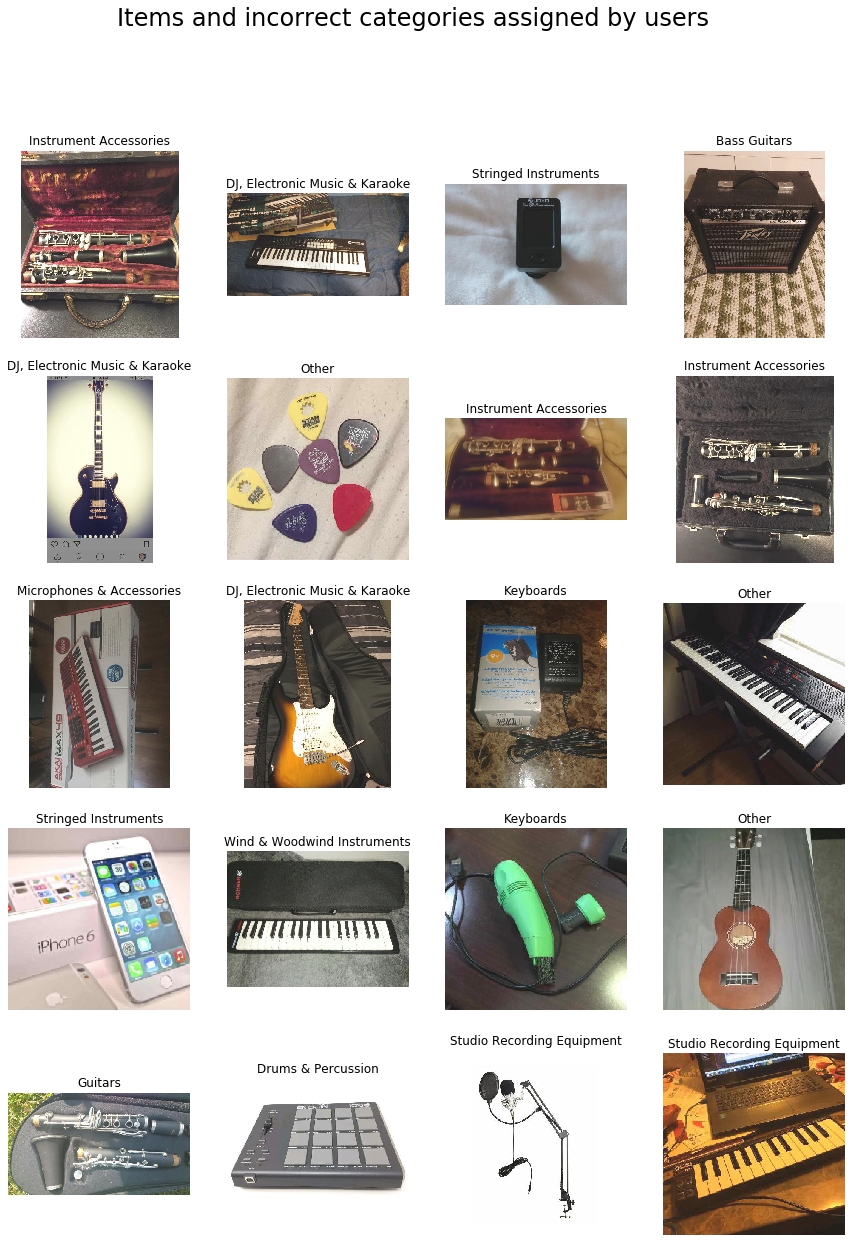

In [7]:
print_images(df_image['id'].values,df_image['category'].values
             ,title='Items and incorrect categories assigned by users',columns = 4)

# 1.2 Descriptions which are not conform to the category

In [8]:
df.sort_values(by='description_gt_distance', ascending=False)[DESCRIPTION_COLUMNS].head(10)

id                                     name  \
5577  m56353762366              Guitar USB Flash drive 16GB   
7487  m34688637258                            Drum Clip Kit   
6462  m31353003309                     3 Felt Ukulele Picks   
6055    m151426794                              Mini violin   
1202  m92613414033                          Instrument Case   
6684  m35539269899                               MIDI Cable   
6866  m26725743850  (5) PC - Yeah Bass Clear Calls Or Songs   
3318    m833303947        Armstrong 102 C-foot Silver Flute   
498   m11811421560                          Mesh pop filter   
1705  m90840745785     Electric Guitar W/case And Amplifier   

                                                                                                                                                                                                  description  \
5577                                                                                                                                                                           Fun USB Flash Drive!Guitar16GB   
7487                                                                                                                                                  Brand new, still in box. Comes with contact microphone.   
6462                                                                                                                                                                                             3 felt picks   
6055                                                                                                                                                             Cool little novelty piece,,about 7 inches,,,   
1202                                                                                                                                              Brand New Case , Tags Torn OffFor Small String Instruments!   
6684                                        Cable IN-OUT MIDI to USB, interface cable FTP Chip ,5 PIN, No Need Drivers and Cnvert Piano Keyboard Instruments with Laptop PC MAC, 1.95m brand new. Never used.   
6866  Yes A Free Night Black Charger Included !   :) Intelligent noise reductionnd you get to choose fromClean cool colors!Look at the price, they are All New!.BUILT IN :*Microphone-Answer and TalkIn a ...   
3318                                                                                                                           excellent condition sells on Reverb for $100+Your gain my loss. Comes with cas   
498                                                                                                                                                                                              Sterling PF2   
1705  This is a Bullet strat guitar, like new. Never been used. Is comes with a case,n amplifier, and a guitar stand. The amplifier comes with amp cord and power cable. Everything is ready and looking f...   

                            category description_class_prediction  \
5577                         Guitars    Microphones & Accessories   
7487              Drums & Percussion    Microphones & Accessories   
6462            Stringed Instruments       Instrument Accessories   
6055            Stringed Instruments                    Keyboards   
1202  DJ, Electronic Music & Karaoke         Stringed Instruments   
6684                    Bass Guitars                    Keyboards   
6866                    Bass Guitars    Microphones & Accessories   
3318                Band & Orchestra         Amplifiers & Effects   
498       Studio Recording Equipment            Brass Instruments   
1705  DJ, Electronic Music & Karaoke         Amplifiers & Effects   

      description_gt_distance  description_probability  
5577                 0.832536                 0.577286  
7487                 0.832510                 0.879376  
6462                 0.832501                 0.991858  
6055                 0.832433     

# 1.3  Titles which are not conform to the category


In [9]:
df.sort_values(by='title_gt_distance', ascending=False)[TITLE_COLUMNS].head(15)

id                                      name  \
983     m125933277                           Keyboard bundle   
3700    m878852534              Yamaha piano keyboard EZ-200   
9959    m550042720                        Zildjian stick bag   
9999  m69423151584                              Guitar stand   
9372  m13990073858         Sustain Pedal for Keyboard, Piano   
113   m54796913817    Akai Mpk Mini Mk2 Synthesizer Keyboard   
1705  m90840745785      Electric Guitar W/case And Amplifier   
3409    m856706577                           Electric violin   
2712  m91181003167                                  Drum Pad   
6833    m895893660                                    Guitar   
5005  m74521524145            Electric Piano with Microphone   
9233  m11266304086             Yamaha Keyboard Sustain Pedal   
9680  m58102541426                          ❤️TRUMPET MUTE❤️   
449   m19493820109  (Holding)Akai Professional MPK  keyboard   
3390    m809483421  The Offspring Guitar/Keyboard Sheetmusic   

                            category  title_class_prediction  \
983   DJ, Electronic Music & Karaoke               Keyboards   
3700     Wind & Woodwind Instruments               Keyboards   
9959       Microphones & Accessories      Drums & Percussion   
9999       Microphones & Accessories  Instrument Accessories   
9372            Amplifiers & Effects               Keyboards   
113       Studio Recording Equipment               Keyboards   
1705  DJ, Electronic Music & Karaoke                 Guitars   
3409     Wind & Woodwind Instruments    Stringed Instruments   
2712          Instrument Accessories      Drums & Percussion   
6833                    Bass Guitars                 Guitars   
5005                       Keyboards    Amplifiers & Effects   
9233            Amplifiers & Effects               Keyboards   
9680       Microphones & Accessories       Brass Instruments   
449       Studio Recording Equipment               Keyboards   
3390                Band & Orchestra                 Guitars   

      title_gt_distance  title_probability  
983            0.832555           0.989947  
3700           0.832555           0.985920  
9959           0.832555           0.880618  
9999           0.832554           0.620640  
9372           0.832554           0.987086  
113            0.832552           0.996017  
1705           0.832549           0.632226  
3409           0.832544           0.928607  
2712           0.832543           0.992282  
6833           0.832539           0.915092  
5005           0.832537           0.871239  
9233           0.832537           0.978172  
9680           0.832537           0.589485  
449            0.832523           0.987209  
3390           0.832502           0.410407

# 2 Descriptions which are not conform to titles

In [10]:
df.sort_values(by='description_title_distance', 
                               ascending=False)[DESCRIPTION_TITLE_COLUMNS].head(10)

id  \
7953   m53169824679   
7487   m34688637258   
8442   m90123696669   
6799     m306864713   
10572  m59494017089   
1781   m34484222575   
4975     m115538603   
3895   m26243523587   
9134   m94685223517   
7787     m643888463   

                                                                                              description  \
7953                                                                       Great for making hip hop beats   
7487                                              Brand new, still in box. Comes with contact microphone.   
8442                                                           It comes with a microphone and an earphone   
6799   Digital precision DD-55 works perfect . I don't have the cable power . But the bttery works well .   
10572                                                           Collapsible Stand with music note reader!   
1781                                                    Pyle pdwm24502 mic VHF wireless microphone system   
4975                                                                     100% brand new. Worth getting it   
3895                                                                            It is a regular harmonica   
9134                                                                  Good Condition. Use For Karaoke Too   
7787                                                                         good shape, adjustable stand   

                         name                        category  \
7953        Mini MPK Keyboard                       Keyboards   
7487            Drum Clip Kit              Drums & Percussion   
8442                    Piano                       Keyboards   
6799              YAMAHA drum              Drums & Percussion   
10572        Microphone Stand       Microphones & Accessories   
1781                       dj  DJ, Electronic Music & Karaoke   
4975            Drum's Sticks              Drums & Percussion   
3895                Harmonica     Wind & Woodwind Instruments   
9134         Guitar Amplifier            Amplifiers & Effects   
7787   Casio keyboard w stand                       Keyboards   

         description_class_prediction          title_class_prediction  \
7953   DJ, Electronic Music & Karaoke                       Keyboards   
7487        Microphones & Accessories              Drums & Percussion   
8442        Microphones & Accessories                       Keyboards   
6799        Microphones & Accessories              Drums & Percussion   
10572          Instrument Accessories       Microphones & Accessories   
1781        Microphones & Accessories  DJ, Electronic Music & Karaoke   
4975                          Guitars              Drums & Percussion   
3895                          Guitars     Wind & Woodwind Instruments   
9134   DJ, Electronic Music & Karaoke            Amplifiers & Effects   
7787           Instrument Accessories                       Keyboards   

       description_title_distance  description_probability  title_probability  
7953                     0.831598                 0.848425           0.997702  
7487                     0.831036                 0.879376           0.967335  
8442                     0.830899                 0.964678           0.954131  
6799                     0.829549                 0.267495           0.991670  
10572                    0.829488                 0.545722           0.960384  
1781                     0.828017                 0.994275           0.998317  
4975                     0.826624                 0.461342           0.991604  
3895                     0.826571                 0.756149           0.958171  
9134                     0.825840                 0.867477           0.674913  
7787                     0.825653                 0.972806           0.993730

# 3 Image/Description inconsistency


In [11]:
df_desc_image = df.sort_values(by='description_image_distance', 
                               ascending=False)[DESCRIPTION_IMAGE_COLUMNS].head(10)
df_desc_image

id  \
3318     m833303947   
7787     m643888463   
10161  m51505486045   
4911     m845940598   
9134   m94685223517   
6681     m162883072   
3991   m61393205188   
8709   m78536560938   
10219  m98777904207   
10594  m12589111491   

                                                                                                                                                                                                   description  \
3318                                                                                                                            excellent condition sells on Reverb for $100+Your gain my loss. Comes with cas   
7787                                                                                                                                                                              good shape, adjustable stand   
10161                                                                                                                                                    Pyle professional lavalier wireless microphone system   
4911                                                                                                                                  Like new condition. Only played once. Originally from the Guitar Center.   
9134                                                                                                                                                                       Good Condition. Use For Karaoke Too   
6681                                                                                                                 Bought an extra set - not needed. Can ship asap - plz look at my other listingso bundle!!   
3991                                                                                                                                                                                             Red harmonica   
8709                                                                                         Beautiful instrument in perfect condition. Original price was $5,500.00 plus taxand shipping. Never needs tuning.   
10219  One shock-mount from amazonOne original blue pop filterThey were used for myblue spark and blue bird microphone.  Shock mount was purchased march this year, blue pop filter was purchased June. The...   
10594                                                                                  sturdy full metal body buildcrisp and clean soundgreat for podcasts/recordinglug and play for pc/laptopretail price $30   

                          category    description_class_prediction  \
3318              Band & Orchestra            Amplifiers & Effects   
7787                     Keyboards          Instrument Accessories   
10161    Microphones & Accessories       Microphones & Accessories   
4911            Drums & Percussion                         Guitars   
9134          Amplifiers & Effects  DJ, Electronic Music & Karaoke   
6681            Drums & Percussion          Instrument Accessories   
3991   Wind & Woodwind Instruments                         Guitars   
8709                     Keyboards            Stringed Instruments   
10219    Microphones & Accessories       Microphones & Accessories   
10594    Microphones & Accessories          Instrument Accessories   

            image_class_prediction  description_image_distance  \
3318   Wind & Woodwind Instruments                    0.819736   
7787                     Keyboards                    0.814376   
10161                    Keyboards                    0.813801   
4911            Drums & Percussion                    0.812773   
9134          Amplifiers & Effects                    0.811441   
6681            Drums & Percussion                    0.809575   
3991   Wind & Woodwind Instruments                    0.809264   
8709                     Keyboards                    0.808582   
10219       Instrument Accessories                    0.807050   
10594    Microphones 

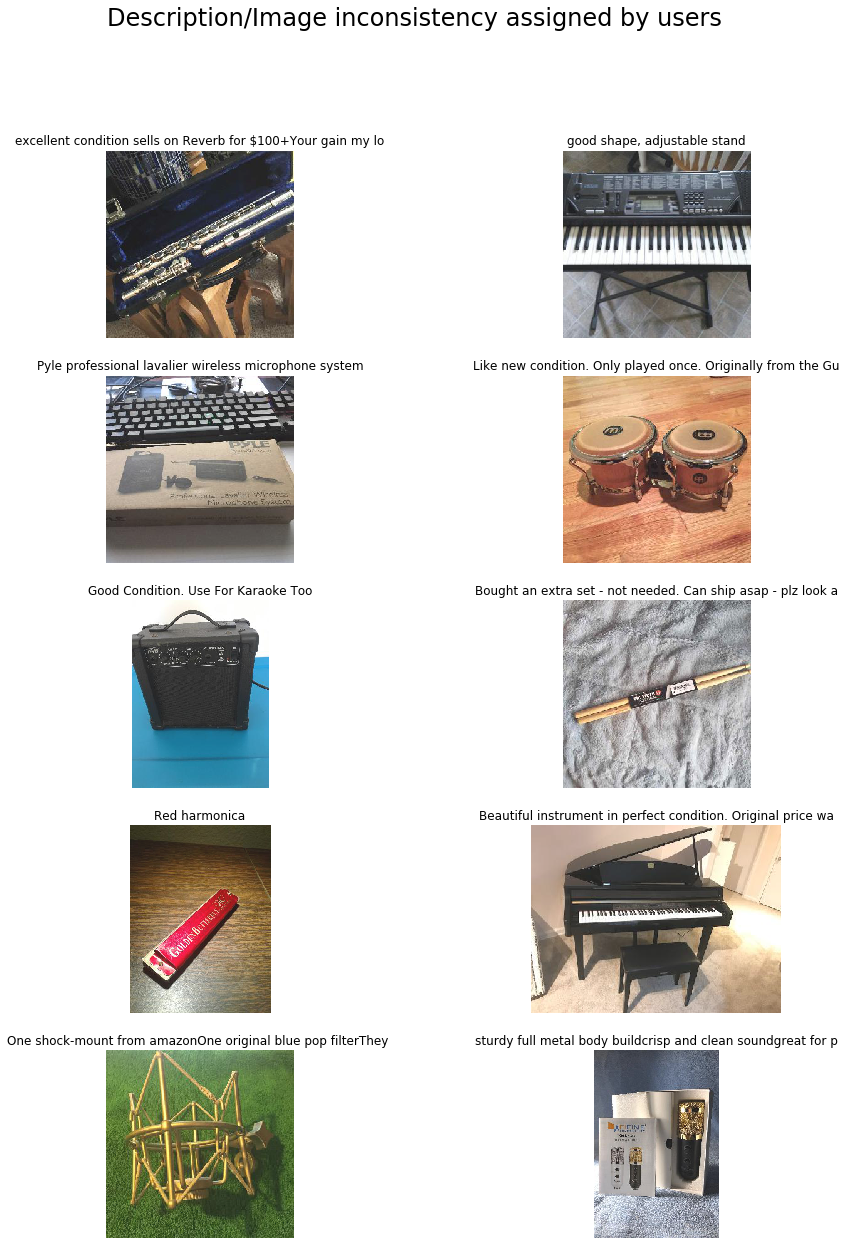

In [12]:
print_images(df_desc_image['id'].values,[f[:60] for f in df_desc_image['description'].values]
             ,title='Description/Image inconsistency assigned by users',columns = 2)